In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\hotel_booking_demand\hotel_bookings.csv"
df_hotel = pd.read_csv(url)
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [3]:
# vemos un poco el dataframe en general
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [18]:
# nan values percentage
(df_hotel.isnull().sum().sort_values(ascending=False).head(5) / len(df_hotel)) * 100

company      94.306893
agent        13.686238
country       0.408744
children      0.003350
lead_time     0.000000
dtype: float64

In [19]:
# replace nan values
nan_replaces = {"children": 0.0, "country":"unknown","agent":0, "company":0}
df_hotel_clean = df_hotel.fillna(nan_replaces)

In [4]:
#Where do the guests come from? (cancelled are included)
df_hotel["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [37]:
countrys_city = df_hotel_clean[df_hotel_clean["hotel"] == "City Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100

country_resorts = df_hotel_clean[df_hotel_clean ["hotel"] == "Resort Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100


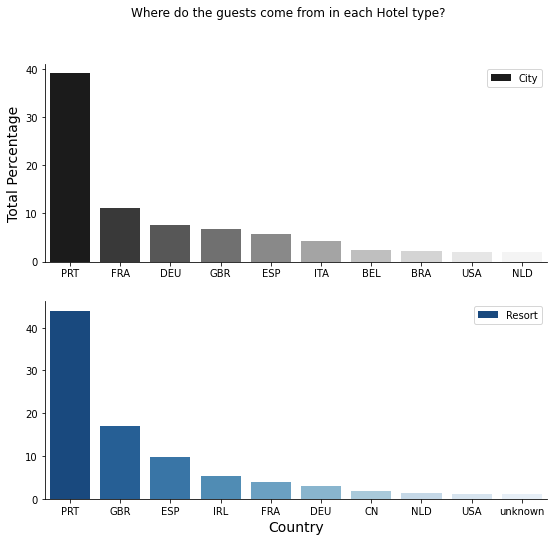

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
sns.barplot(y="country", x="index", palette="Greys_r",ax=ax1, label="City", data=countrys_city.reset_index())
ax1.set_ylabel("Total Percentage",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax1.set_yticks(np.arange(0,50,10))
ax1.set_xlabel("")
ax1.legend()
sns.despine()


sns.barplot(y="country", x="index", palette="Blues_r",ax=ax2, label="Resort", data=country_resorts.reset_index())
ax2.set_xlabel("Country",fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax2.set_ylabel("")
ax2.legend()
fig.suptitle("Where do the guests come from in each Hotel type?",fontdict={'fontsize': 17, 'fontweight': 'medium'})
sns.despine()


In [30]:
# clean rows where adults == 0; we have to drop them
zero_adults = list(df_hotel_clean[df_hotel_clean["adults"] == 0].index)
df_hotel_clean.drop(df_hotel_clean.index[zero_adults], inplace=True)

In [36]:
# home country of guest (total adults guest)
df_hotel_clean.groupby("country")["adults"].sum().sort_values(ascending=False).head(10)

country
PRT    86131
GBR    23223
FRA    20291
ESP    16615
DEU    13703
ITA     7384
IRL     6570
BEL     4588
BRA     4450
USA     3950
Name: adults, dtype: int64

In [51]:
# How much do guests pay for a room per night? EUROS
# we first filter by hotel type and only count the non-cancelled reservations
city_active = df_hotel_clean[(df_hotel_clean["is_canceled"] == 0) & (df_hotel_clean["hotel"] == "City Hotel") ]
resort_active = df_hotel_clean[(df_hotel_clean["is_canceled"] == 0) & (df_hotel_clean["hotel"] == "Resort Hotel") ]

# now we divided reservation price and total guest (children included)
price_person_city = city_active["adr"] / (city_active["adults"] + city_active["children"])
price_person_resort = resort_active["adr"] / (resort_active["adults"] + resort_active["children"])

print(" the price per person and hotel are:")
print("____________________________________\n")
print (f"city_hotel: {round(price_person_city.mean(),2)} EUROS" )   
print (f"resort_hotel: {round(price_person_resort.mean(),2)} EUROS")    

the price per person and hotel are:
____________________________________

city_hotel: 59.33 EUROS
resort_hotel: 47.49 EUROS
